# Designing a Cool Data Science Logo for your Personal Brand

If you ask me, data science is a whole lot about visualization. Therefore, when you want to brand yourself as a data scientist, you should convey this through a visually appealing logo. Today, I would like to share some insights about how to design a cool data science logo, using trigonometry and the beauty of randomness.

The resolution is optimized for LinkedIn's cover image (1584 x 396).

## Prerequisites

For this purpose, not many packages are required. We will use numpy to build trigonometric structures and matplotlib for drawing the logo.

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

First, we define the trigonometric functions that produce spirals and circles. The code for these functions is inspired by the dataset synthesiser functions in [Tensorflow's playground](https://github.com/tensorflow/playground/blob/master/src/dataset.ts).

In [6]:
def gen_spiral(delta_t, n, noise):
    
    xs = []
    ys = []

    for i in range(n):
        r = i / n * 5
        t = 1.75 * i / n * 2 * np.pi + delta_t
        x = r * np.sin(t) + np.random.uniform(-1, 1) * noise
        y = r * np.cos(t) + np.random.uniform(-1, 1) * noise
        
        xs.append(x)
        ys.append(y)
        
    return(xs, ys)

In [7]:
def gen_circle(min_radius, max_radius, n, noise):
    
    radius = 1
    
    xs = []
    ys = []
    
    for i in range(n):        
        r = np.random.uniform(min_radius, max_radius)
        angle = np.random.uniform(0, 2 * np.pi)
        
        x = r * np.sin(angle)
        y = r * np.cos(angle)
        
        noise_x = np.random.uniform(-radius, radius) * noise
        noise_y = np.random.uniform(-radius, radius) * noise
        
        x += noise_x
        y += noise_y
        
        xs.append(x)
        ys.append(y)
        
    return(xs, ys)

This way, we can generate an inner and an outer circle, as well as two parallel spirals.

In [10]:
n = 500

circle_coords = [gen_circle(0, 0.5, n, 0.01), gen_circle(0.7, 1, n, 0.01)]
spiral_coords = [gen_spiral(0, n, 0.2), gen_spiral(np.pi - 1, n, 0.2)]

coords_list = [circle_coords, spiral_coords]

Next we extract all colormap names from matplotlib. For the sake of simplicity, we will only consider the first five maps.

In [13]:
cmaps_names = sorted(m for m in plt.cm.datad if not m.endswith("_r"))[:5]

The next function takes a list of coordinates and the name of a colormap and generates the individual point information for a scatterplot. You can see that many attributes are selected at random. If you are curious about the parameters I am setting here, you should check out the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of matplotlib's scatter() function.

In [14]:
def get_plot_vals(coords, cmap_name):
    
    cmap = matplotlib.cm.get_cmap(cmap_name)
    n = len(coords[0][0])
    
    plot_dict_1 = {
      'x': coords[0][0],
      'y': coords[0][1],
      's': np.random.uniform(1, 10, n),
      'c': cmap(np.random.uniform(0, 0.5, n)),
      'marker': np.random.choice(('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'), n),
      'alpha': np.random.uniform(0, 1, n),
      'linewidths': np.random.uniform(1, 10, n),
      'edgecolors': cmap(np.random.uniform(0, 0.5, n))
    }
    
    plot_dict_2 = {
      'x': coords[1][0],
      'y': coords[1][1],
      's': np.random.uniform(1, 10, n),
      'c': cmap(np.random.uniform(0.5, 1, n)),
      'marker': np.random.choice(('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'), n),
      'alpha': np.random.uniform(0, 1, n),
      'linewidths': np.random.uniform(1, 10, n),
      'edgecolors': cmap(np.random.uniform(0.5, 1, n))
    }
    
    v1 = [dict(zip(plot_dict_1,t)) for t in zip(*plot_dict_1.values())]
    v2 = [dict(zip(plot_dict_2,t)) for t in zip(*plot_dict_2.values())]
    
    return(v1, v2)

Finally, the last function takes as input the individual points and plots them on an axes.

In [15]:
def create_logo(v1, v2, ax):

    for p in v1:
        ax.scatter(**p)
    for p in v2:
        ax.scatter(**p)

    ax.text(0.15, 0.7, 'Jan-Benedikt Jagusch',
            verticalalignment='top',
            horizontalalignment='center',
            transform=ax.transAxes,
            color='white', fontsize=25,
            fontweight='bold')
    
    ax.text(0.85, 0.7, "Data Science\nMachine Learning\nData Visualization",
            verticalalignment='top',
            horizontalalignment='center',
            transform=ax.transAxes,
            color='white', fontsize=25,
            linespacing=2)

This way, we can interate through various colormaps and shapes to see which combination we like best.

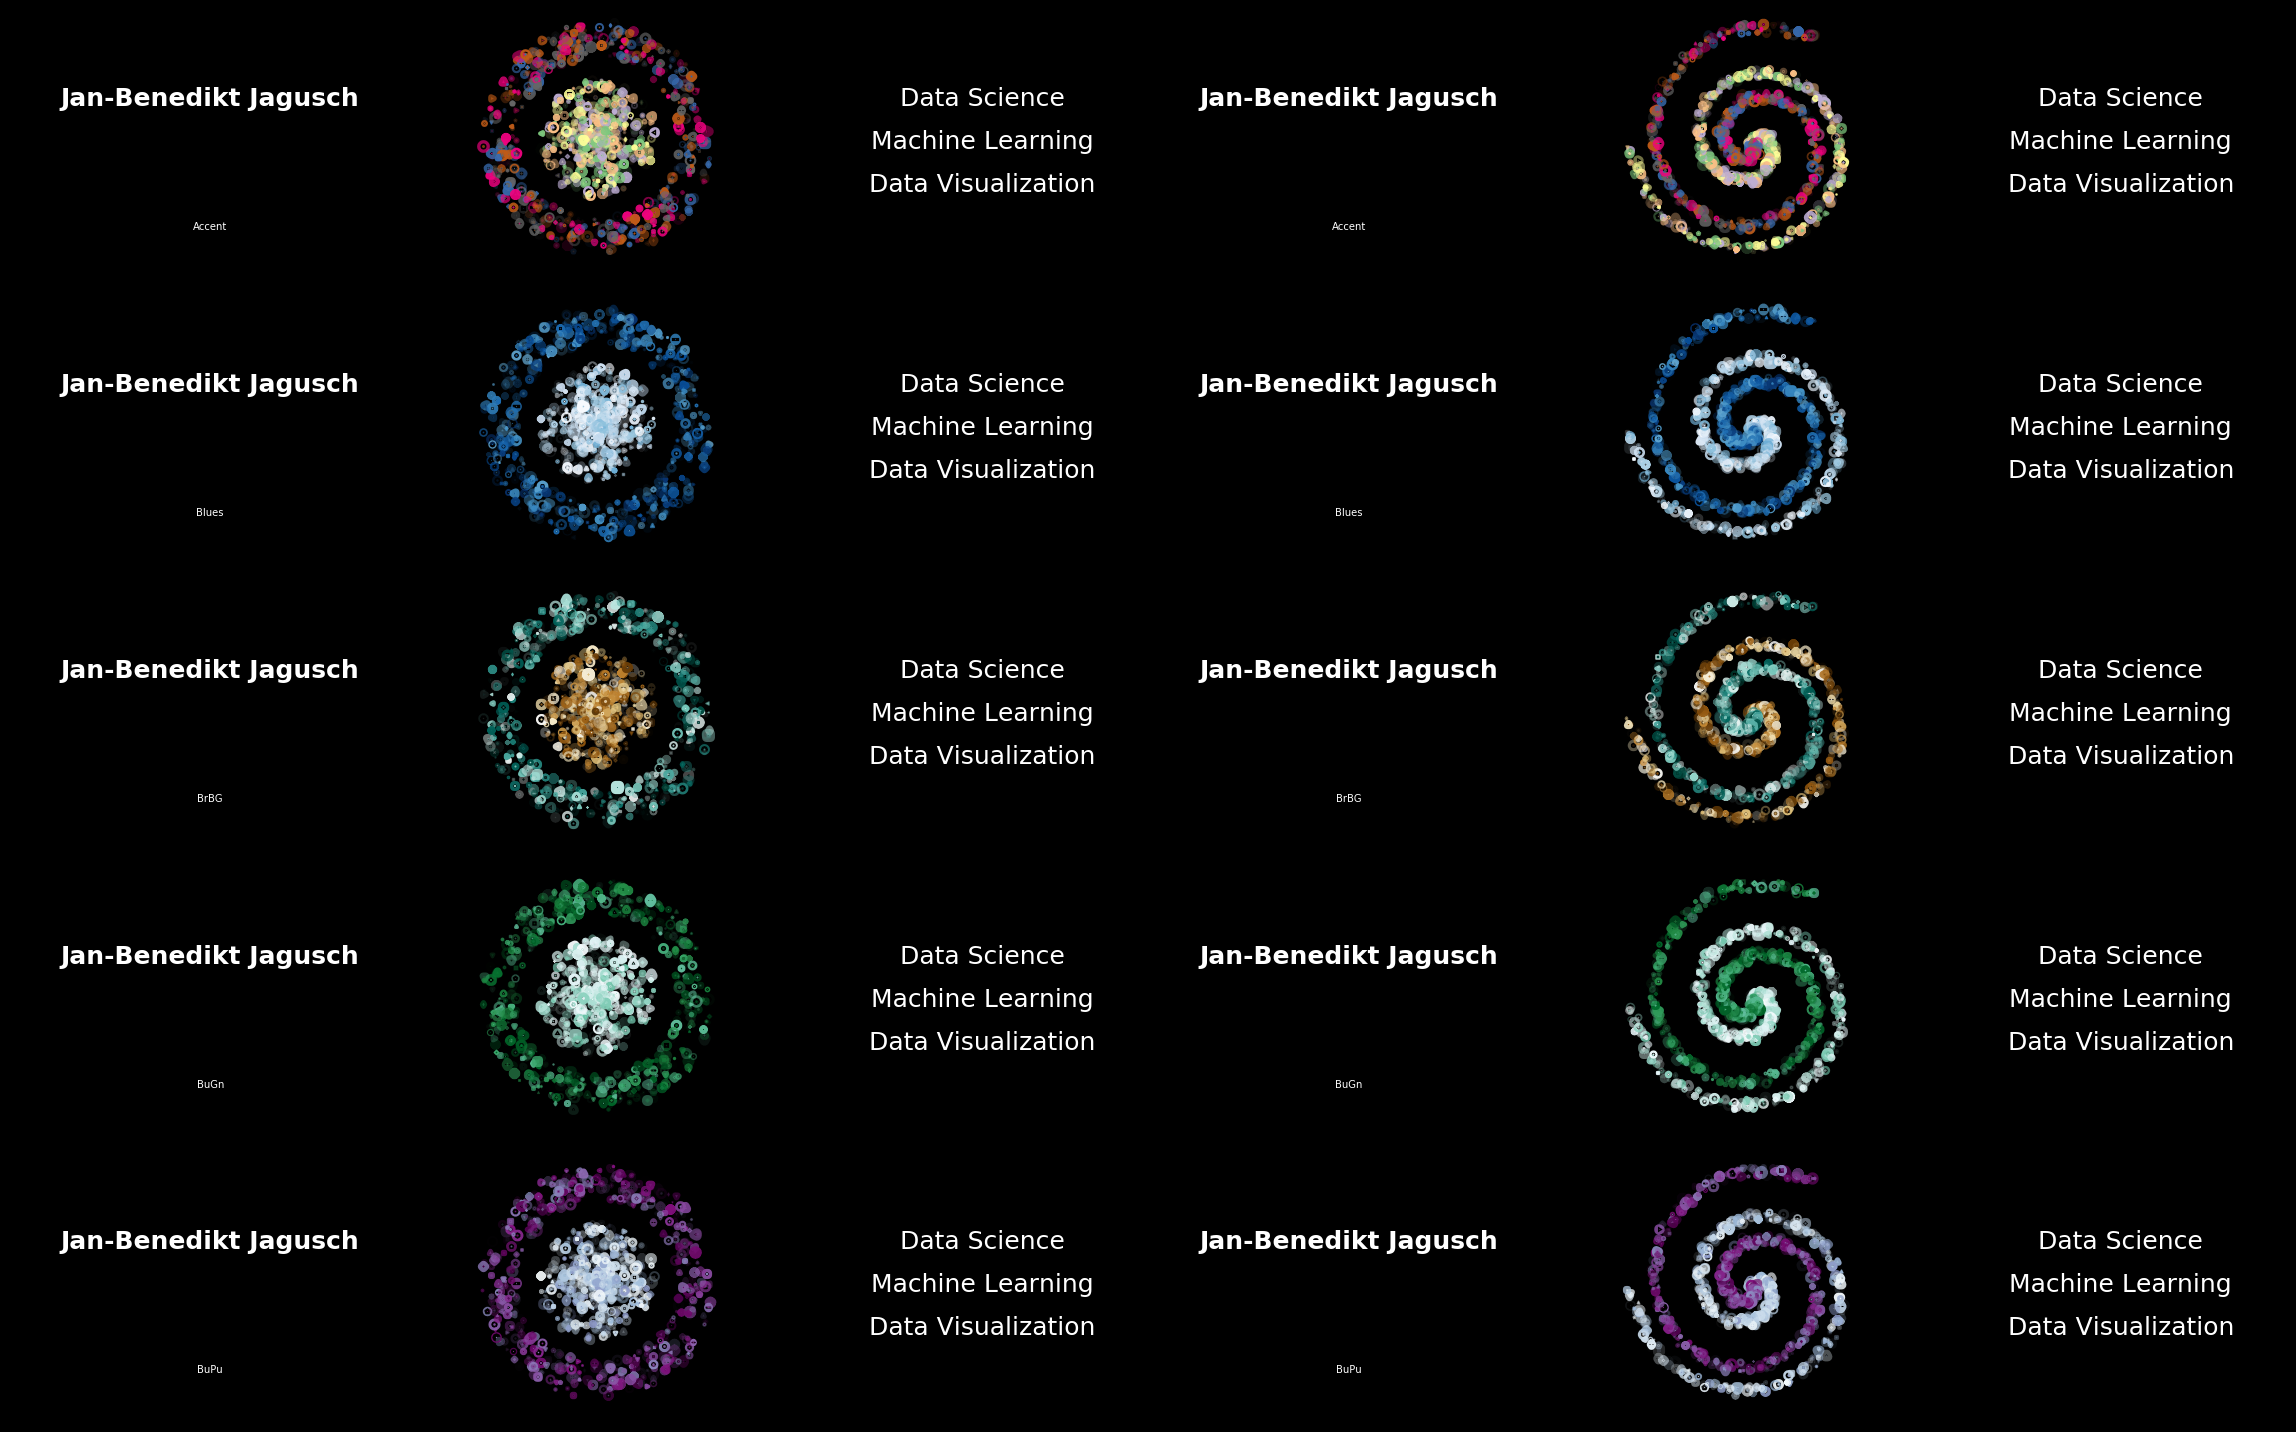

In [16]:
n_cmaps = len(cmaps_names)
n_coords = len(coords_list)

plt.close('all')

fig = plt.figure(figsize=(16*n_coords, 4*n_cmaps))
fig.patch.set_facecolor('black')

n = 0

for i, cmap_name in enumerate(cmaps_names):
    for j, coords in enumerate(coords_list):
        
        n += 1
        
        ax = plt.subplot(n_cmaps, n_coords, n)
        
        v1, v2 = get_plot_vals(coords, cmap_name)
        
        create_logo(v1, v2, ax)
        ax.text(0.15, 0.15, cmap_name,
                verticalalignment='center',         
                horizontalalignment='center',
                transform=ax.transAxes,
                color='white', 
                fontsize=10)
        
        ax.set_facecolor('Black')
        ax.axis('equal')
        ax.axis('off')

plt.tight_layout()       
plt.savefig('combinations.png', dpi=99, facecolor='Black')

You can export your favorite combination as follows.

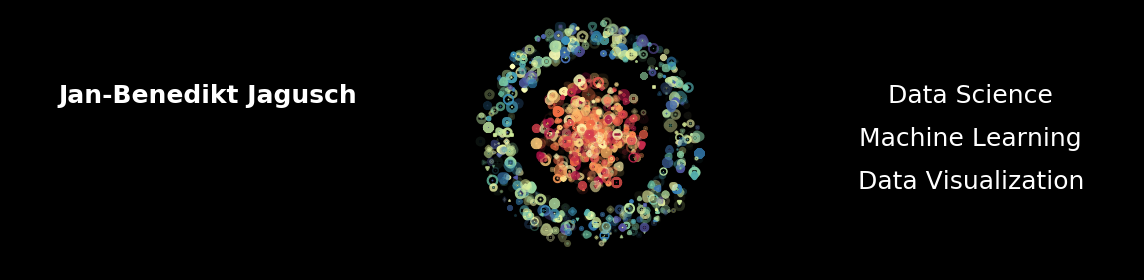

In [18]:
plt.close('all')

fig = plt.figure(figsize=(16, 4))
fig.patch.set_facecolor('black')

ax = plt.gca()

v1, v2 = get_plot_vals(circle_coords, 'Spectral')

create_logo(v1, v2, ax)

ax.set_facecolor('Black')
ax.axis('equal')
ax.axis('off')

plt.tight_layout()       
plt.savefig('logo.png', dpi=99, facecolor='Black')

Thanks for reading through my notebook. I hope this has been of value for you!